In [1]:
from FDFD.Fdfd import Fdfd

import matplotlib.pylab as plt
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
omega = 5e14                # angular frequency (2pi)
dl = 1e-7                   # grid size (m)
eps_r = np.ones((500,500))  # relative permittivity
eps_r[40:60, 40:60] = 5     # define box
NPML = [3, 3]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)

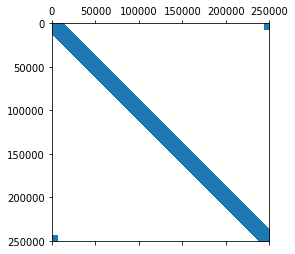

In [14]:
# look at sparsity pattern of A
plt.spy(simulation.A)
plt.show()

In [15]:
# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))*1j
b[70,70] = 1
(Hx,Hy,Ez)    = simulation.solve_fields(b, timing=True, solver='pardiso')
(Hx1,Hy1,Ez1) = simulation.solve_fields(b, timing=True, solver='scipy')

Linear system solve took 1.65 seconds
Linear system solve took 18.35 seconds


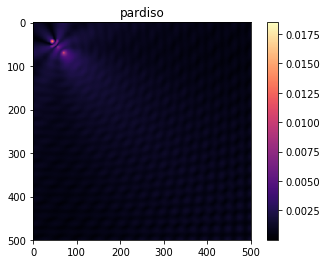

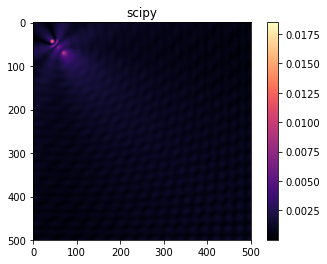

In [17]:
# plot
plt.figure()
plt.imshow(np.abs(Ez), cmap='magma')
plt.colorbar()
plt.title('pardiso')
plt.show()
# plot
plt.figure()
plt.imshow(np.abs(Ez1), cmap='magma')
plt.colorbar()
plt.title('scipy')
plt.show()